<a href="https://colab.research.google.com/github/AdjalmaAguiar/PUC-RIO/blob/main/%20An%C3%A1lise%20de%20Dados%20e%20Boas%20Pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Questão de Negócio:**

Uma área específica que tem tido bastante pesquisa e investimento em torno de Machine Learning e Inteligência Artificial, é a área de imóveis. Com dados de uma região, um algoritmo pode classificar e identificar se aquele imóvel é bom ou não para comprar, auxiliando uma pessoa na examinação de um imóvel de forma que ele seja o melhor para o cliente. Não só isso, algoritmos de machine learning podem trazer novos insights na compra e venda de imóveis, ao aprender os dados e designar uma importância a cada uma das variáveis nos dados do imóvel. Portanto um dos grandes desafios é encontrar modelos e algoritmos que equilibram a precisão na compra de um imóvel. Esse estudo busca aprofundar no diagnóstico de como irenmos escolher 5 imóveis para investir e 5 imóveis que não deixariamos nosso cliente investir de modo algum.

# **O Entendimento do Negócio:**

Os dados são da ***geodacenter.github.io***, em King County - Condado de King - Washington, Estados Unidos. O Condado de King é um dos 39 condados do estado americano de Washington. A sede e cidade mais populosa do condado é Seattle. Foi fundado em 1852. Com mais de 2,2 milhões de habitantes, de acordo com o censo nacional de 2020, é o condado mais populoso do estado e o 12º mais populoso do país. O Dataset apresenta a venda de imóveis e suas características na região de Maio de 2014 à Maio de 2015. Tem um total de 21613 registros com um total de 21 atributos. Iremos buscar as ferramentas necessárias para catalogar e mostrar quais são os 5 melhores imóveis devemos investir e quais são os 5 piores imóveis a se investir de acordo com os dados recebidos.

# **A Coleta de Dados:**

Dataset: https://www.kaggle.com/harlfoxem/housesalesprediction

Dataset Detalhado: https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import datetime as dt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import pandas as pd
import xgboost as xgb
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
from matplotlib import rcParams
import mpl_toolkits
from math import exp, log, log1p
from random import random
from IPython.display import display
from IPython.display import HTML
%matplotlib inline


# **A Limpeza de Dados:**

- Remoção de dados outliers e valores ausentes

Carregammos nosso dataset por completo com a função do Pandas e notamos que ele possuem 21.613 registros (linhas). A priori não precisamos utilizar todos os dados então iremos selecionar apenas 10.000 linhas do conjunto de dados!

In [4]:
#Visualizando o dataset para primeiras impressões:
kcs = pd.read_csv("/content/kc_house_data.csv")
kcs

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [8]:
# Removendo as colunas "lat" e "long" do dataset
kcs = kcs.drop(columns=["lat", "long"])
kcs.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


# **A Exploração de Dados:**

In [9]:
# Foram utilizados as premissas abaixo para definir as 5 merlhores casas para se investir

In [10]:
melhores_Aguiar = kcs[(kcs["condition"]==5) & (kcs["view"]==4) & (kcs["waterfront"]>0) & (kcs["grade"] >=9) & (kcs["yr_built"] >0)]

melhores_Aguiar

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
6508,4217402115,20150421T000000,3650000.0,6,4.75,5480,19401,1.5,1,4,5,11,3910,1570,1936,0,98105,3510,15810
11257,3761100045,20140618T000000,3000000.0,4,4.25,4850,12445,2.0,1,4,5,10,3850,1000,1989,0,98034,3350,12210
14619,7936500109,20140725T000000,2230000.0,3,3.00,3620,28064,2.0,1,4,5,10,2370,1250,1977,0,98136,2550,34713
14682,7278100515,20140821T000000,1295000.0,2,2.50,2910,19449,2.0,1,4,5,9,1940,970,1985,0,98177,2540,23598
19600,284000025,20150420T000000,1410000.0,2,2.00,2180,18525,1.0,1,4,5,9,1580,600,1952,0,98146,2480,21503


In [11]:
# Foram utilizados as premissas abaixo para definir as 5 piores casas para se investir

In [12]:
piores_Aguiar = kcs[(kcs["condition"]==1) & (kcs["view"]==0) & (kcs["waterfront"]==0) & (kcs["grade"] <=5) & (kcs["yr_built"] <=1942)]

piores_Aguiar

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
36,9435300030,20140528T000000,550000.0,4,1.0,1660,34848,1.0,0,0,1,5,930,730,1933,0,98052,2160,11467
4651,859000110,20141002T000000,125000.0,1,1.0,500,7440,1.0,0,0,1,5,500,0,1928,0,98106,1350,7440
13628,2023049218,20140716T000000,105500.0,2,1.0,930,7740,1.0,0,0,1,5,930,0,1932,0,98148,1620,8584
13629,2023049218,20150316T000000,445000.0,2,1.0,930,7740,1.0,0,0,1,5,930,0,1932,0,98148,1620,8584
15293,40000362,20140506T000000,78000.0,2,1.0,780,16344,1.0,0,0,1,5,780,0,1942,0,98168,1700,10387


In [19]:
np.median(kcs['price'])

450000.0

In [23]:
np.average(kcs['price'])

540088.1417665294

In [30]:
np.median(kcs["price"])

450000.0

In [34]:
np.std(kcs["price"])

367118.7031813723

In [35]:
kcs. describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


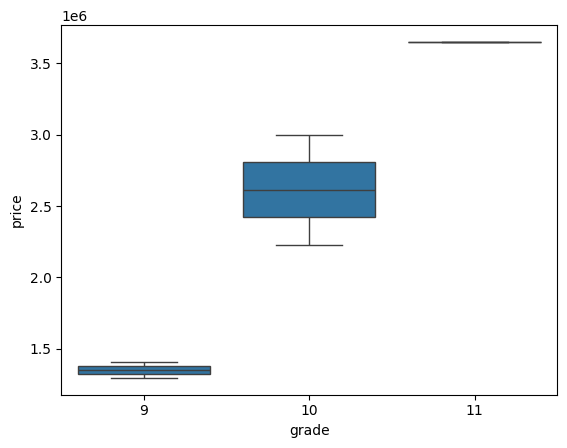

In [31]:
sns.boxplot(data= melhores_Aguiar,x='grade', y='price');

## ***Análise final + Sugestão de imóveis ***

Os 5 melhores foram escolhidos seguindo os seguinte critérios: Foi levado em consideração a melhor Condição da casa, melhor Gral de quão belo e a vista do imóvel, o imóveL foi construído de frente para o mar, melhor classificação de material utilizado na construção, Não levei em consideração o ano de construção do imóvel devido as ultimas variantes serem do nivel máximo deixando assim a variante ano do imóvel irrelevante seguindo os critérios que utilizei.

In [32]:
melhores_Aguiar

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
6508,4217402115,20150421T000000,3650000.0,6,4.75,5480,19401,1.5,1,4,5,11,3910,1570,1936,0,98105,3510,15810
11257,3761100045,20140618T000000,3000000.0,4,4.25,4850,12445,2.0,1,4,5,10,3850,1000,1989,0,98034,3350,12210
14619,7936500109,20140725T000000,2230000.0,3,3.00,3620,28064,2.0,1,4,5,10,2370,1250,1977,0,98136,2550,34713
14682,7278100515,20140821T000000,1295000.0,2,2.50,2910,19449,2.0,1,4,5,9,1940,970,1985,0,98177,2540,23598
19600,284000025,20150420T000000,1410000.0,2,2.00,2180,18525,1.0,1,4,5,9,1580,600,1952,0,98146,2480,21503


Os 5 piores foram escolhidos seguindo os seguinte critérios: Foi levado em consideração a pior Condição da casa, pior vista do imóvel, o imóveL foi não foi construído de frente para o mar, pior classificação de material utilizado na construção e anos de contrução anteriores a 1942.

In [33]:
piores_Aguiar

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
36,9435300030,20140528T000000,550000.0,4,1.0,1660,34848,1.0,0,0,1,5,930,730,1933,0,98052,2160,11467
4651,859000110,20141002T000000,125000.0,1,1.0,500,7440,1.0,0,0,1,5,500,0,1928,0,98106,1350,7440
13628,2023049218,20140716T000000,105500.0,2,1.0,930,7740,1.0,0,0,1,5,930,0,1932,0,98148,1620,8584
13629,2023049218,20150316T000000,445000.0,2,1.0,930,7740,1.0,0,0,1,5,930,0,1932,0,98148,1620,8584
15293,40000362,20140506T000000,78000.0,2,1.0,780,16344,1.0,0,0,1,5,780,0,1942,0,98168,1700,10387
